In [2]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests
from dotenv import load_dotenv

load_dotenv('../.env')

True

In [3]:
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
client = OpenAI(api_key=OPENAI_API_KEY)

In [7]:
video = cv2.VideoCapture("../demo-videos/pacman-s.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")
chunkSize = 100
chunks = [base64Frames[i:i + chunkSize] for i in range(0, len(base64Frames), chunkSize)]
print(len(chunks), "chunks created.")

228 frames read.
3 chunks created.


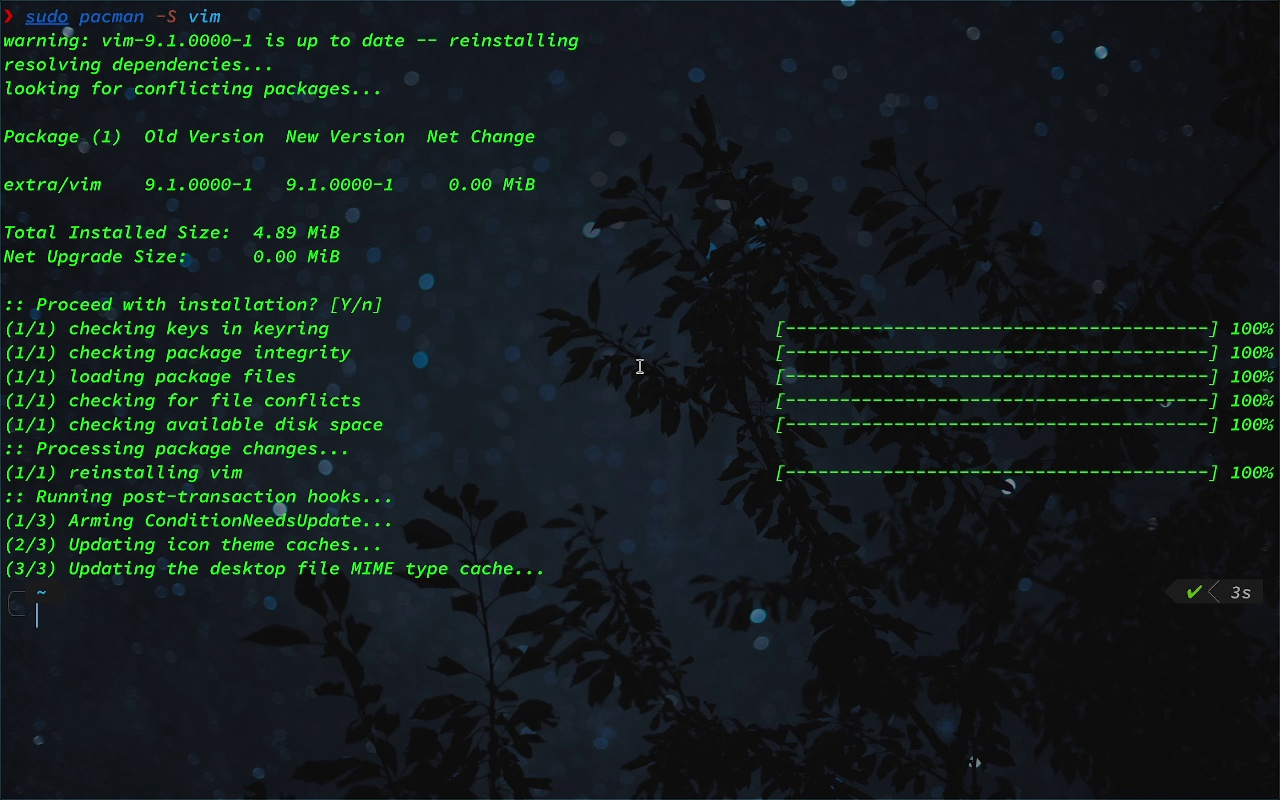

In [9]:
display_handle = display(None, display_id=True)
for img in chunks[1]:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)